In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_excel('imputed_cs_no_outliers.xlsx')

In [4]:
df.index = df['Name']
columns = df.columns
df = df.drop('Name', axis=1)
df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
Name,,,,,,,,,,,,,,,,,
ABBOTT LABORATORIES,7.231108,1.34,1.6236,0.4534,4.4189,0.1372,1.0284,4.16010,1.6038,17.3865,21.6524,2.8112,22.7615,25.9185,40.4234,18.4862,63.687300
ABBVIE INC,7.835458,3.67,0.9829,0.4676,4.7352,0.2391,0.7799,3.58184,4.2846,-5.7113,22.5993,4.9472,24.8771,11.1084,12.7365,11.1910,107.055581
AGILENT TECHNOLOGIES INC,7.083882,0.98,3.2861,1.9189,12.3733,0.0892,2.5816,4.51130,0.9199,14.3616,18.5933,1.5808,23.1583,22.8545,23.7855,16.7575,39.356800
AMEDISYS INC,7.360721,3.64,1.0074,0.0909,21.0513,0.0020,0.9403,7.77520,0.0000,15.0619,22.2011,0.0439,10.1294,17.7027,31.1381,21.5339,1.530600
AMERISOURCEBERGEN CORP,8.158421,7.61,0.9291,0.0894,7.6128,0.1996,0.4954,6.70440,1.6482,13.7551,12.3807,2.2061,1.1634,18.6908,17.1407,9.6021,141.319500


In [5]:
#df = df.drop(['index', 't'], axis=1)

In [6]:
columns = df.columns

In [7]:
nans = 0
nan_percent = []
print(len(df.count()))
print(len(df))
for column in columns:
    #print(column, 1-len(df[column].dropna())/len(df[column]))
    nan_percent.append(1-len(df[column].dropna())/len(df[column]))
    nans += len(df[column])-len(df[column].dropna())
nan_total = pd.DataFrame([nan_percent])
nan_total.columns = df.columns
nan_total.index = ['nan, %']
print('Share of missing values =', nans/(len(df.count())*len(df)))

17
96
Share of missing values = 0.0


In [8]:
nan_total

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
"nan, %",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#companies = list(df['Name'])

In [10]:
variables = columns[1:]
#companies = df[columns[0]]

In [11]:
X = np.array(df[variables])

In [12]:
y = np.array(df[columns[0]])

Standardize the data:

In [32]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=42)

In [42]:
df.corr()

,cost_of_equity,EPS,current_ratio,ebit_to_total_int_exp,debt_to_ev,quick_ratio,p_to_b,bk_per_sh,mv_to_ebitda,debt_to_ebitda,p_to_fcf,p_to_e,ev_to_ebitda,debt_to_equity,ebitda_to_net_sales
cost_of_equity,1.000000,0.076137,0.069951,0.071855,0.169859,0.076488,0.131078,0.103376,0.078739,-0.008780,-0.019112,0.121713,0.147783,0.048406,0.019862
EPS,0.076137,1.000000,0.021200,0.057266,-0.138456,0.032565,0.083666,0.901908,0.110888,-0.088614,0.035375,0.239950,0.219139,-0.092992,0.206749
current_ratio,0.069951,0.021200,1.000000,0.164365,-0.347517,0.965999,0.014155,0.033727,0.131136,-0.225373,0.044428,0.251026,0.212588,-0.218421,0.236747
ebit_to_total_int_exp,0.071855,0.057266,0.164365,1.000000,-0.193726,0.146361,-0.009348,0.085283,-0.013349,-0.131927,0.048449,0.188944,0.006481,-0.132251,-0.012478
debt_to_ev,0.169859,-0.138456,-0.347517,-0.193726,1.000000,-0.304046,-0.291042,-0.161064,-0.167335,0.552805,-0.134037,-0.233658,-0.326086,0.448920,-0.227119
quick_ratio,0.076488,0.032565,0.965999,0.146361,-0.304046,1.000000,0.041297,0.035499,0.119459,-0.211849,0.035432,0.243012,0.223709,-0.204063,0.252637
p_to_b,0.131078,0.083666,0.014155,-0.009348,-0.291042,0.041297,1.000000,0.060701,0.406480,-0.171255,0.028108,0.255280,0.651804,0.298638,0.236053
bk_per_sh,0.103376,0.901908,0.033727,0.085283,-0.161064,0.035499,0.060701,1.000000,0.141063,-0.096570,0.047938,0.287022,0.236778,-0.126535,0.173413
mv_to_ebitda,0.078739,0.110888,0.131136,-0.013349,-0.167335,0.119459,0.406480,0.141063,1.000000,0.405825,0.079164,0.507723,0.696803,-0.083782,-0.144121
debt_to_ebitda,-0.008780,-0.088614,-0.225373,-0.131927,0.552805,-0.211849,-0.171255,-0.096570,0.405825,1.000000,-0.064414,0.123579,-0.102538,0.240774,-0.382571


In [99]:
import time
start = time.time()
scoring = make_scorer(mean_squared_error, greater_is_better = False)#Choose MSE as a score
g_cv = GridSearchCV(RandomForestRegressor(min_samples_leaf = 5, max_features = 4, random_state = 42),
              param_grid={'n_estimators': range(50, 251, 25),
                          'max_depth': range(5, 70, 5), 'min_samples_split': range(10, 23, 2)
                         },
              scoring=scoring, cv=4, n_jobs = -1, refit=True, return_train_score=True, iid=True)
g_cv.fit(X_train, y_train)#Train the model
print('Оптимальные параметры:', g_cv.best_params_)
result = g_cv.cv_results_ #Results for all combinations of parametres
print(-1*pd.DataFrame(g_cv.cv_results_)['mean_test_score'].max(), ' - min MSE')
end = time.time()
print(end - start)

Оптимальные параметры: {'max_depth': 5, 'min_samples_split': 22, 'n_estimators': 175}
7.313308261781486  - минимальное MSE
269.827143907547


In [100]:
results = pd.DataFrame(result)[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'mean_test_score', 'mean_train_score']]

In [101]:
pd.DataFrame(g_cv.cv_results_).sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
626,0.371639,0.015243,0.023276,0.001765,50,22,175,"{'max_depth': 50, 'min_samples_split': 22, 'n_...",-5.91616,-6.966413,...,-4.598985,-7.313308,2.707256,1,-5.416018,-4.832185,-3.948183,-5.75798,-4.988591,0.685851
374,0.336028,0.017930,0.030609,0.007171,30,22,175,"{'max_depth': 30, 'min_samples_split': 22, 'n_...",-5.91616,-6.966413,...,-4.598985,-7.313308,2.707256,1,-5.416018,-4.832185,-3.948183,-5.75798,-4.988591,0.685851
563,0.407729,0.016986,0.037775,0.008643,45,22,175,"{'max_depth': 45, 'min_samples_split': 22, 'n_...",-5.91616,-6.966413,...,-4.598985,-7.313308,2.707256,1,-5.416018,-4.832185,-3.948183,-5.75798,-4.988591,0.685851
59,0.231623,0.008329,0.018547,0.000767,5,22,175,"{'max_depth': 5, 'min_samples_split': 22, 'n_e...",-5.91616,-6.966413,...,-4.598985,-7.313308,2.707256,1,-5.416018,-4.832185,-3.948183,-5.75798,-4.988591,0.685851
437,0.391350,0.029782,0.037012,0.008552,35,22,175,"{'max_depth': 35, 'min_samples_split': 22, 'n_...",-5.91616,-6.966413,...,-4.598985,-7.313308,2.707256,1,-5.416018,-4.832185,-3.948183,-5.75798,-4.988591,0.685851


In [102]:
md = results[['param_max_depth', 'mean_test_score', 'mean_train_score']]
md[md['param_max_depth'] == 2]['mean_train_score'].max()
md_test_scores = []
md_train_scores = []
md_set = set(results['param_max_depth'])
for element in sorted(md_set):
    md_test_scores.append(md[md['param_max_depth'] == element]['mean_test_score'].max())
    md_train_scores.append(md[md['param_max_depth'] == element]['mean_train_score'].max())
md = pd.DataFrame([sorted(md_set), md_test_scores, md_train_scores]).T
md.columns = ['max_depth', 'min mean_test_score', 'min mean_train_score']
md

,max_depth,min mean_test_score,min mean_train_score
0,5.0,-7.313308,-4.046894
1,10.0,-7.313308,-4.046397
2,15.0,-7.313308,-4.046397
3,20.0,-7.313308,-4.046397
4,25.0,-7.313308,-4.046397
5,30.0,-7.313308,-4.046397
6,35.0,-7.313308,-4.046397
7,40.0,-7.313308,-4.046397
8,45.0,-7.313308,-4.046397
9,50.0,-7.313308,-4.046397


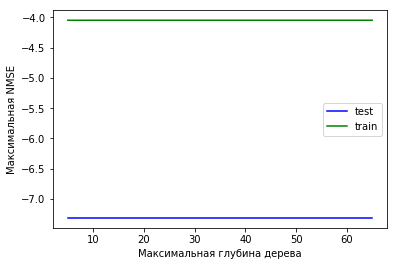

In [103]:
plt.plot(md['max_depth'], md['min mean_test_score'], 'b')
plt.plot(md['max_depth'], md['min mean_train_score'], 'g')
plt.xlabel('Максимальная глубина дерева')#max treee depth
plt.ylabel('Максимальная NMSE')#max negative MSE
plt.legend(['test', 'train'])
plt.show()

In [104]:
n_est = results[['param_n_estimators', 'mean_test_score', 'mean_train_score']]
n_est_test_scores = []
n_est_train_scores = []
n_est_set = set(results['param_n_estimators'])
for element in sorted(n_est_set):
    n_est_test_scores.append(n_est[n_est['param_n_estimators'] == element]['mean_test_score'].max())
    n_est_train_scores.append(n_est[n_est['param_n_estimators'] == element]['mean_train_score'].max())
n_est = pd.DataFrame([sorted(n_est_set), n_est_test_scores, n_est_train_scores]).T
n_est.columns = ['n_estimators', 'min mean_test_score', 'min mean_train_score']
n_est

,n_estimators,min mean_test_score,min mean_train_score
0,50.0,-7.482105,-4.117366
1,75.0,-7.412035,-4.058864
2,100.0,-7.392346,-4.046397
3,125.0,-7.391498,-4.049919
4,150.0,-7.384896,-4.059557
5,175.0,-7.313308,-4.074537
6,200.0,-7.318046,-4.078045
7,225.0,-7.314654,-4.082570
8,250.0,-7.319847,-4.087585


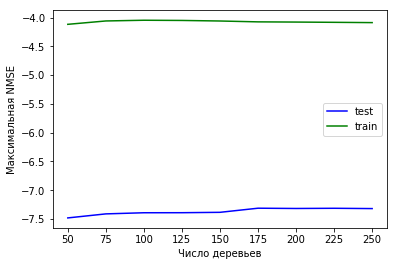

In [105]:
plt.plot(n_est['n_estimators'], n_est['min mean_test_score'], 'b')
plt.plot(n_est['n_estimators'], n_est['min mean_train_score'], 'g')
plt.xlabel('Число деревьев')#number of estimators (trees)
plt.ylabel('Максимальная NMSE')#max NMSE
plt.legend(['test', 'train'])
plt.show()

The more trees in the ansamble the lower the MSE.

In [106]:
mssplit = results[['param_min_samples_split', 'mean_test_score', 'mean_train_score']]
mssplit_test_scores = []
mssplit_train_scores = []
mssplit_set = set(results['param_min_samples_split'])
for element in sorted(mssplit_set):
    mssplit_test_scores.append(mssplit[mssplit['param_min_samples_split'] == element]['mean_test_score'].max())
    mssplit_train_scores.append(mssplit[mssplit['param_min_samples_split'] == element]['mean_train_score'].max())
mssplit = pd.DataFrame([sorted(mssplit_set), mssplit_test_scores, mssplit_train_scores]).T
mssplit.columns = ['min_samples_split', 'min mean_test_score', 'min mean_train_score']
mssplit

,min_samples_split,min mean_test_score,min mean_train_score
0,10.0,-7.519468,-4.046397
1,12.0,-7.458380,-4.251475
2,14.0,-7.408315,-4.411997
3,16.0,-7.385341,-4.567694
4,18.0,-7.333900,-4.709478
5,20.0,-7.333777,-4.831938
6,22.0,-7.313308,-4.973919


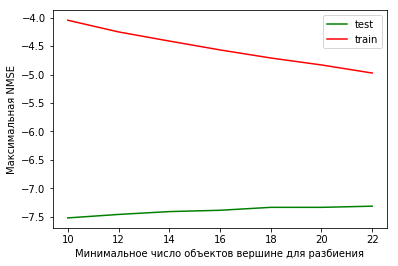

In [107]:
plt.plot(mssplit['min_samples_split'], mssplit['min mean_test_score'], 'g')
plt.plot(mssplit['min_samples_split'], mssplit['min mean_train_score'], 'r')
plt.xlabel('Минимальное число объектов вершине для разбиения')#min samples split
plt.ylabel('Максимальная NMSE')#max Negative MSE
plt.legend(['test', 'train'])
plt.show()

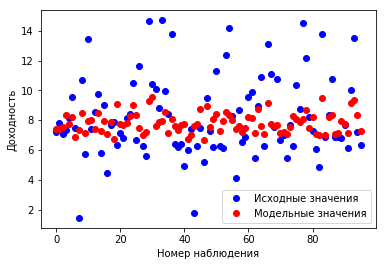

In [110]:
plt.plot(y, 'bo')
plt.plot(g_cv.best_estimator_.predict(X), 'ro')
plt.xlabel('Номер наблюдения')#observation
plt.ylabel('Доходность')#return
plt.legend(['Исходные значения', 'Модельные значения'])#actual values, predicted values
plt.show()

In [111]:
importances = g_cv.best_estimator_.feature_importances_
indices = columns[1:]

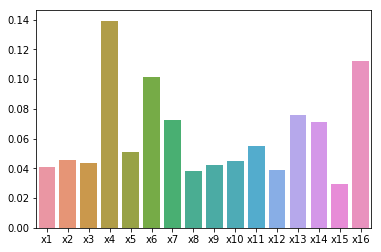

In [112]:
sns.barplot(x= indices, y=importances)

In [113]:
g_cv.best_estimator_.feature_importances_

array([0.04057271, 0.04533205, 0.04362038, 0.1392752 , 0.05072686,
       0.10115262, 0.07218482, 0.03791472, 0.04218805, 0.04468565,
       0.05520629, 0.0391392 , 0.07555038, 0.07115543, 0.02937202,
       0.11192362])

A number of trees with big depth:

In [131]:
import time
start = time.time()
scoring = make_scorer(mean_squared_error, greater_is_better=False)#Выбор MSE в качестве метрики
g_cv2 = GridSearchCV(RandomForestRegressor(min_samples_leaf = 5, max_features=4, random_state=0),
              param_grid={'max_depth': range(10, 70, 10), 'n_estimators': range(10, 100, 10), 
                          'min_samples_split': range(10, 51, 2)},
              scoring=scoring, cv=4, n_jobs = -1, refit=True, return_train_score=True, iid=True)
g_cv2.fit(X_train, y_train)#Обучение модели
print('Оптимальные параметры:', g_cv2.best_params_)
result2 = g_cv2.cv_results_ #Результаты для всех рассмотренных параметров
print(-1*pd.DataFrame(g_cv2.cv_results_)['mean_test_score'].max(), ' - минимальное MSE')
end = time.time()
print(end - start)

Оптимальные параметры: {'max_depth': 10, 'min_samples_split': 32, 'n_estimators': 10}
7.131750176008375  - минимальное MSE
128.54254531860352


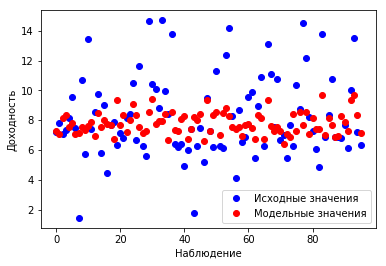

In [143]:
plt.plot(y, 'bo')
plt.plot(g_cv2.best_estimator_.predict(X), 'ro')
plt.xlabel('Наблюдение')#observation
plt.ylabel('Доходность')#return
plt.legend(['Исходные значения', 'Модельные значения'])#actual value, predicted value
plt.show()

In [133]:
results2 = pd.DataFrame(result2)[['param_max_depth', 'param_min_samples_split', 'param_n_estimators', 'mean_test_score', 'mean_train_score']]

In [134]:
pd.DataFrame(g_cv2.cv_results_).sort_values('rank_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
594,0.015324,0.001060,0.002071,0.000036,40,16,10,"{'max_depth': 40, 'min_samples_split': 16, 'n_...",-5.713825,-8.296539,...,-5.731313,-8.028761,2.719582,1129,-4.666741,-4.488670,-3.911094,-5.721725,-4.697058,0.654222
972,0.026252,0.005889,0.003116,0.001234,60,16,10,"{'max_depth': 60, 'min_samples_split': 16, 'n_...",-5.713825,-8.296539,...,-5.731313,-8.028761,2.719582,1129,-4.666741,-4.488670,-3.911094,-5.721725,-4.697058,0.654222
783,0.018015,0.001724,0.003357,0.000840,50,16,10,"{'max_depth': 50, 'min_samples_split': 16, 'n_...",-5.713825,-8.296539,...,-5.731313,-8.028761,2.719582,1129,-4.666741,-4.488670,-3.911094,-5.721725,-4.697058,0.654222
216,0.016573,0.005350,0.002066,0.000137,20,16,10,"{'max_depth': 20, 'min_samples_split': 16, 'n_...",-5.713825,-8.296539,...,-5.731313,-8.028761,2.719582,1129,-4.666741,-4.488670,-3.911094,-5.721725,-4.697058,0.654222
27,0.013739,0.000420,0.001956,0.000098,10,16,10,"{'max_depth': 10, 'min_samples_split': 16, 'n_...",-5.713825,-8.296539,...,-5.731313,-8.028761,2.719582,1129,-4.666741,-4.488670,-3.911094,-5.721725,-4.697058,0.654222
405,0.029283,0.002652,0.003014,0.000949,30,16,10,"{'max_depth': 30, 'min_samples_split': 16, 'n_...",-5.713825,-8.296539,...,-5.731313,-8.028761,2.719582,1129,-4.666741,-4.488670,-3.911094,-5.721725,-4.697058,0.654222
946,0.044705,0.009085,0.003588,0.000153,60,10,20,"{'max_depth': 60, 'min_samples_split': 10, 'n_...",-6.330060,-7.768547,...,-5.022346,-7.997720,2.975940,1123,-4.380008,-3.950088,-3.333346,-4.894500,-4.139486,0.573069
190,0.026146,0.000265,0.002940,0.000059,20,10,20,"{'max_depth': 20, 'min_samples_split': 10, 'n_...",-6.330060,-7.768547,...,-5.022346,-7.997720,2.975940,1123,-4.380008,-3.950088,-3.333346,-4.894500,-4.139486,0.573069
757,0.038797,0.010592,0.004799,0.002313,50,10,20,"{'max_depth': 50, 'min_samples_split': 10, 'n_...",-6.330060,-7.768547,...,-5.022346,-7.997720,2.975940,1123,-4.380008,-3.950088,-3.333346,-4.894500,-4.139486,0.573069
568,0.030261,0.004126,0.003335,0.000295,40,10,20,"{'max_depth': 40, 'min_samples_split': 10, 'n_...",-6.330060,-7.768547,...,-5.022346,-7.997720,2.975940,1123,-4.380008,-3.950088,-3.333346,-4.894500,-4.139486,0.573069


In [135]:
md2 = results2[['param_max_depth', 'mean_test_score', 'mean_train_score']]
md2[md2['param_max_depth'] == 2]['mean_train_score'].max()
md2_test_scores = []
md2_train_scores = []
md2_set = set(results2['param_max_depth'])
for element in sorted(md2_set):
    md2_test_scores.append(md2[md2['param_max_depth'] == element]['mean_test_score'].max())
    md2_train_scores.append(md2[md2['param_max_depth'] == element]['mean_train_score'].max())
md2 = pd.DataFrame([sorted(md2_set), md2_test_scores, md2_train_scores]).T
md2.columns = ['max_depth', 'max neg_mean_test_score', 'max neg_mean_train_score']
md2

,max_depth,max neg_mean_test_score,max neg_mean_train_score
0,10.0,-7.13175,-4.066034
1,20.0,-7.13175,-4.066034
2,30.0,-7.13175,-4.066034
3,40.0,-7.13175,-4.066034
4,50.0,-7.13175,-4.066034
5,60.0,-7.13175,-4.066034


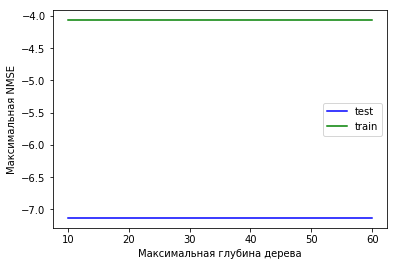

In [136]:
plt.plot(md2['max_depth'], md2['max neg_mean_test_score'], 'b')
plt.plot(md2['max_depth'], md2['max neg_mean_train_score'], 'g')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('Максимальная NMSE')
plt.legend(['test', 'train'])
plt.show()

In [137]:
n_est2 = results2[['param_n_estimators', 'mean_test_score', 'mean_train_score']]
n_est2_test_scores = []
n_est2_train_scores = []
n_est2_set = set(results2['param_n_estimators'])
for element in sorted(n_est2_set):
    n_est2_test_scores.append(n_est2[n_est2['param_n_estimators'] == element]['mean_test_score'].max())
    n_est2_train_scores.append(n_est2[n_est2['param_n_estimators'] == element]['mean_train_score'].max())
n_est2 = pd.DataFrame([sorted(n_est2_set), n_est2_test_scores, n_est2_train_scores]).T
n_est2.columns = ['n_estimators', 'max neg_mean_test_score', 'max neg_mean_train_score']
n_est2

,n_estimators,max neg_mean_test_score,max neg_mean_train_score
0,10.0,-7.131750,-4.267671
1,20.0,-7.170724,-4.139486
2,30.0,-7.227943,-4.100769
3,40.0,-7.227212,-4.066034
4,50.0,-7.304404,-4.099499
5,60.0,-7.346495,-4.094331
6,70.0,-7.368087,-4.104303
7,80.0,-7.375036,-4.088144
8,90.0,-7.351254,-4.106073


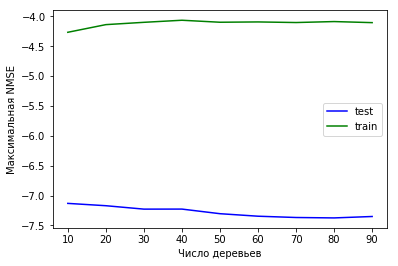

In [138]:
plt.plot(n_est2['n_estimators'], n_est2['max neg_mean_test_score'], 'b')
plt.plot(n_est2['n_estimators'], n_est2['max neg_mean_train_score'], 'g')
plt.xlabel('Число деревьев')
plt.ylabel('Максимальная NMSE')
plt.legend(['test', 'train'])
plt.show()

In [139]:
mssplit2 = results2[['param_min_samples_split', 'mean_test_score', 'mean_train_score']]
mssplit2_test_scores = []
mssplit2_train_scores = []
mssplit2_set = set(results2['param_min_samples_split'])
for element in sorted(mssplit2_set):
    mssplit2_test_scores.append(mssplit2[mssplit2['param_min_samples_split'] == element]['mean_test_score'].max())
    mssplit2_train_scores.append(mssplit2[mssplit2['param_min_samples_split'] == element]['mean_train_score'].max())
mssplit2 = pd.DataFrame([sorted(mssplit2_set), mssplit2_test_scores, mssplit2_train_scores]).T
mssplit2.columns = ['min_samples_split', 'max neg_mean_test_score', 'max neg_mean_train_score']
mssplit2

,min_samples_split,max neg_mean_test_score,max neg_mean_train_score
0,10.0,-7.652150,-4.066034
1,12.0,-7.569114,-4.245958
2,14.0,-7.555117,-4.424692
3,16.0,-7.594135,-4.577213
4,18.0,-7.515141,-4.735140
5,20.0,-7.468629,-4.872765
6,22.0,-7.436912,-5.014596
7,24.0,-7.397929,-5.162214
8,26.0,-7.401971,-5.285303
9,28.0,-7.353448,-5.394507


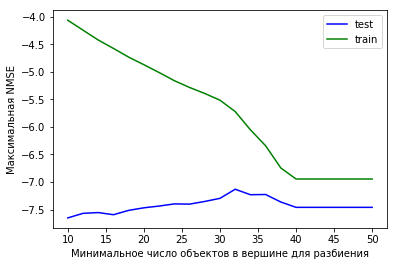

In [140]:
plt.plot(mssplit2['min_samples_split'], mssplit2['max neg_mean_test_score'], 'b')
plt.plot(mssplit2['min_samples_split'], mssplit2['max neg_mean_train_score'], 'g')
plt.xlabel('Минимальное число объектов в вершине для разбиения')
plt.ylabel('Максимальная NMSE')
plt.legend(['test', 'train'])
plt.show()

In [141]:
importances2 = g_cv2.best_estimator_.feature_importances_

In [149]:
importances2

array([0.        , 0.04964898, 0.04050233, 0.3204561 , 0.        ,
       0.04603644, 0.03465024, 0.0129883 , 0.        , 0.        ,
       0.        , 0.05376703, 0.06534976, 0.        , 0.        ,
       0.37660083])

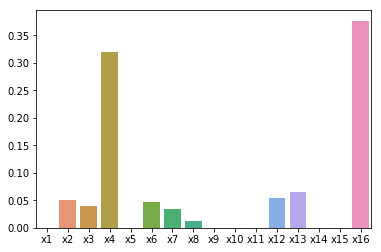

In [142]:
sns.barplot(x=indices, y=importances2)

In [144]:
pd.DataFrame(g_cv2.best_estimator_.predict(X)).to_excel('model2_prediction.xlsx')

In [145]:
pd.DataFrame(g_cv.best_estimator_.predict(X)).to_excel('model_prediction.xlsx')

In [146]:
mod2 = pd.DataFrame(g_cv2.best_estimator_.predict(X))
mod1 = pd.DataFrame(g_cv.best_estimator_.predict(X))

In [147]:
mod1.describe()

,0
count,96.000000
mean,7.829240
std,0.671672
min,6.665247
25%,7.301377
50%,7.726989
75%,8.236756
max,9.552090


In [148]:
mod2.describe()

,0
count,96.000000
mean,7.789081
std,0.741097
min,6.429712
25%,7.244246
50%,7.664007
75%,8.318093
max,9.676908


In [692]:
import time
start = time.time()
scoring = make_scorer(mean_squared_error, greater_is_better=False)#Выбор MSE в качестве метрики
g_cv3 = GridSearchCV(RandomForestRegressor(min_samples_leaf = 5, max_features=4, random_state=0),
              param_grid={'max_depth': range(5, 30, 4), 'n_estimators': range(10, 50, 5)},
              scoring=scoring, cv=4, n_jobs = -1, refit=True, return_train_score=True, iid=True)
g_cv3.fit(X2_train, y2_train)#Обучение модели
print('Оптимальные параметры:', g_cv3.best_params_)
result3 = g_cv3.cv_results_ #Результаты для всех рассмотренных параметров
print(-1*pd.DataFrame(g_cv3.cv_results_)['mean_test_score'].max(), ' - минимальное MSE')
end = time.time()
print(end - start)

Оптимальные параметры: {'max_depth': 9, 'n_estimators': 20}
0.9875011234589256  - минимальное MSE
3.4803640842437744


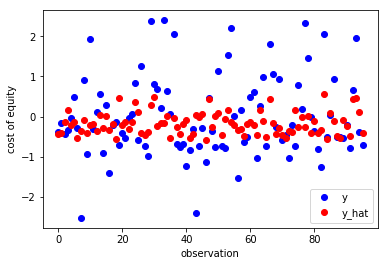

In [819]:
plt.plot(y2_scaled, 'bo')
plt.plot(g_cv2.best_estimator_.predict(X2_scaled), 'ro')
plt.xlabel('observation')
plt.ylabel('cost of equity')
plt.legend(['y', 'y_hat'])
plt.show()